# Tutorial for Calculus
## Part 2: Techniques for Advanced Calculus

Second-semester calculus is typically more challenging.

- One reason for that is that the computational problems are not so straightforward as computing derivatives and basic integrals.
- Another reason is that the second semester is usually where the harder versions of problems from the first semester show up.

Nonetheless, Sage can handle this as well.

Sage includes a large number of indefinite integrals (via Maxima), though not all the ones you will find in a comprehensive table.

In [41]:
h(x)=sec(x)
h.integrate(x)

x |--> log(sec(x) + tan(x))

Since I defined `h` as a function, the answer I get is also a function. If I just want an expression as the answer, I can do the following.

In [42]:
integrate(sec(x),x)

log(sec(x) + tan(x))

Here is another (longer) example. Do you remember what command would help it look nicer in the browser?

In [43]:
integrate(1/(1+x^5),x)

1/5*sqrt(5)*(sqrt(5) + 1)*arctan((4*x + sqrt(5) - 1)/sqrt(2*sqrt(5) + 10))/sqrt(2*sqrt(5) + 10) + 1/5*sqrt(5)*(sqrt(5) - 1)*arctan((4*x - sqrt(5) - 1)/sqrt(-2*sqrt(5) + 10))/sqrt(-2*sqrt(5) + 10) - 1/10*(sqrt(5) + 3)*log(2*x^2 - x*(sqrt(5) + 1) + 2)/(sqrt(5) + 1) - 1/10*(sqrt(5) - 3)*log(2*x^2 + x*(sqrt(5) - 1) + 2)/(sqrt(5) - 1) + 1/5*log(x + 1)

Some integrals are a little tricky, of course. Sage tries hard to integrate using 
- [Maxima](https://maxima.sourceforge.io/), 
- [Giac](https://www-fourier.ujf-grenoble.fr/~parisse/giac.html) and 
- [Sympy](https://www.sympy.org/en/index.html):

In [44]:
integral(1/(1+x^10),x)

1/20*(sqrt(5) + 1)*arctan((4*x + sqrt(-2*sqrt(5) + 10))/(sqrt(5) + 1)) + 1/20*(sqrt(5) + 1)*arctan((4*x - sqrt(-2*sqrt(5) + 10))/(sqrt(5) + 1)) + 1/20*(sqrt(5) - 1)*arctan((4*x + sqrt(2*sqrt(5) + 10))/(sqrt(5) - 1)) + 1/20*(sqrt(5) - 1)*arctan((4*x - sqrt(2*sqrt(5) + 10))/(sqrt(5) - 1)) + 1/40*sqrt(2*sqrt(5) + 10)*log(x^2 + 1/2*x*sqrt(2*sqrt(5) + 10) + 1) - 1/40*sqrt(2*sqrt(5) + 10)*log(x^2 - 1/2*x*sqrt(2*sqrt(5) + 10) + 1) + 1/40*sqrt(-2*sqrt(5) + 10)*log(x^2 + 1/2*x*sqrt(-2*sqrt(5) + 10) + 1) - 1/40*sqrt(-2*sqrt(5) + 10)*log(x^2 - 1/2*x*sqrt(-2*sqrt(5) + 10) + 1) + 1/5*arctan(x)

If you ask for Maxima specifically, the result can be partial:

In [45]:
integral(1/(1+x^10),x, algorithm='maxima')

1/5*arctan(x) - 1/5*integrate((x^6 - 2*x^4 + 3*x^2 - 4)/(x^8 - x^6 + x^4 - x^2 + 1), x)

If no antiderivative is found, the result is just the input:

In [46]:
result = integral(sinh(x^2+sqrt(x-1)),x)  
result  

integrate(sinh(x^2 + sqrt(x - 1)), x)

This last one stumps other systems too.

However, if there is a special function which helps compute the integral, Sage will look for it. In the following case there is no elementary antiderivative, but the `erf` function helps us out.

In [47]:
integral(e^(-x^2),x)

1/2*sqrt(pi)*erf(x)

Do not forget, if this function is unfamiliar to you (as it might be to students trying this integral), Sage’s contextual help system comes to the rescue.

In [48]:
erf?

Type:            LazyImport
String form:     erf
File:            /usr/lib/python3/dist-packages/sage/misc/lazy_import.pyx
Docstring:      
   The error function.

   The error function is defined for real values as

      \operatorname{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}
      dt.

   This function is also defined for complex values, via analytic
   continuation.

   EXAMPLES:

   We can evaluate numerically:

      sage: erf(2)
      erf(2)
      sage: erf(2).n()
      0.995322265018953
      sage: erf(2).n(100)
      0.99532226501895273416206925637
      sage: erf(ComplexField(100)(2+3j))
      -20.829461427614568389103088452 + 8.6873182714701631444280787545*I

   Basic symbolic properties are handled by Sage and Maxima:

      sage: x = var("x")
      sage: diff(erf(x),x)
      2*e^(-x^2)/sqrt(pi)
      sage: integrate(erf(x),x)
      x*erf(x) + e^(-x^2)/sqrt(pi)

   ALGORITHM:

   Sage implements numerical evaluation of the error function via the
   "erf()" function f

### Topics on integration 

There are several ways to do definite integrals in Sage.

The most obvious one is simply turning

$$\int f(x) \, dx$$

into

$$\int_a^b f(x) \, dx$$
    
where $a$ and $b$ are the limits of integration, as indicated in the first section.

In [49]:
integral(cos(x),(x,0,pi/2))

1

The preferred syntax puts the variable and endpoints together in parentheses.

Just like with derivatives, we can visualize this integral using some of the plotting options from the plotting tutorial.

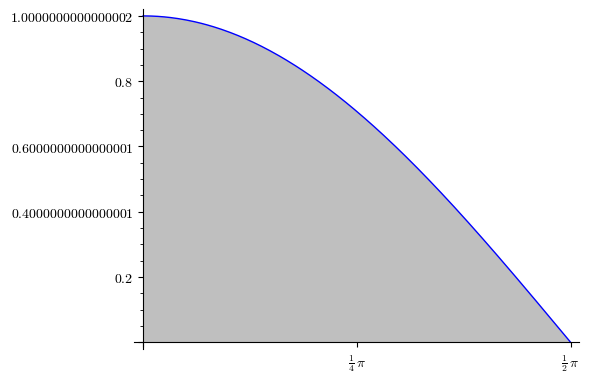

In [50]:
plot(cos(x),(x,0,pi/2),fill=True,ticks=[[0,pi/4,pi/2],None],tick_formatter=pi)

It is possible to be completely symbolic in doing integration. If you do this, you’ll have to make sure you define anything that’s a symbolic variable - which includes constants, naturally.

In [51]:
var('a,b')
integral(cos(x),(x,a,b))

-sin(a) + sin(b)

On the numerical side, sometimes the answer one gets from the Fundamental Theorem of Calculus is not entirely helpful. 

In [52]:
h(x)=sec(x)
integral(h,(x,0,pi/7))

1/2*log(sin(1/7*pi) + 1) - 1/2*log(-sin(1/7*pi) + 1)

Here, just a number might be more helpful. Sage has several ways of numerical evaluating integrals.

- Doing a definite integral symbolically, then approximating it numerically
- The `numerical_integral` function
- The `.nintegrate` method

The first one, using the n or N function for numerical approximation, was also mentioned in the introductory tutorial.

In [53]:
N(integral(h,(x,0,pi/8)))

0.403199719161511

The second function, `numerical_integral`, uses a powerful numerical program (the GNU Scientific Library).
- Unfortunately, the syntax for this function is not yet consistent with the rest of Sage.
- Helpfully, the output has two elements - the answer you desire, and its error tolerance.

In [54]:
numerical_integral(h,0,pi/8)

(0.4031997191615114, 4.476416117355069e-15)

To access just the number, one asks for the ‘zeroth’ element of this sequence of items. This is done with the following bracket notation.

In [55]:
numerical_integral(h,0,pi/8)[0]

0.4031997191615114

Notice that we began counting at zero. This is fairly typical in computer programs (though certainly not universal).

To aid readability (more important than one might think), we often assign the numerical integral to a variable, and then take the zeroth element of that.

In [56]:
ni = numerical_integral(h,0,pi/8)
ni[0]

0.4031997191615114

Finally, the `.nintegrate()` method from Maxima gives even more extra information.

- Notice again the period/dot needed to use this.
- It is only possible to use `h(x)`; doing `h.nintegrate()` raises an error.

In [57]:
h(x).nintegrate(x,0,pi/8)

(0.4031997191615114, 4.47641611735507e-15, 21, 0)

In [60]:
h.nintegrate??

Docstring:
   Compute the numerical integral of self.  Please see
   "sage.calculus.calculus.nintegral" for more details.

   EXAMPLES:

      sage: sin(x).nintegral(x,0,3)
      (1.989992496600..., 2.209335488557...e-14, 21, 0)
Source:   
    def nintegral(self, *args, **kwds):
        """
        Compute the numerical integral of self.  Please see
        :obj:`sage.calculus.calculus.nintegral` for more details.

        EXAMPLES::

            sage: sin(x).nintegral(x,0,3)
            (1.989992496600..., 2.209335488557...e-14, 21, 0)
        """
        from sage.calculus.calculus import nintegral
        return nintegral(self, *args, **kwds)
File:      /usr/lib/python3/dist-packages/sage/symbolic/expression.pyx
Type:      builtin_function_or_method


In [61]:
sage.calculus.calculus.nintegral??

Signature:
sage.calculus.calculus.nintegral(
    ex,
    x,
    a,
    b,
    desired_relative_error='1e-8',
    maximum_num_subintervals=200,
)
Docstring:
   Return a floating point machine precision numerical approximation
   to the integral of "self" from a to b, computed using floating
   point arithmetic via maxima.

   INPUT:

   * "x" - variable to integrate with respect to

   * "a" - lower endpoint of integration

   * "b" - upper endpoint of integration

   * "desired_relative_error" - (default: '1e-8') the desired relative
     error

   * "maximum_num_subintervals" - (default: 200) maxima number of
     subintervals

   OUTPUT:

   * float: approximation to the integral

   * float: estimated absolute error of the approximation

   * the number of integrand evaluations

   * an error code:

     * "0" - no problems were encountered

     * "1" - too many subintervals were done

     * "2" - excessive roundoff error

     * "3" - extremely bad integrand behavior

     * "4" 

### Topics on Sumation

Second-semester calculus usually also covers various topics in summation. Sage can sum many abstract series; the notation is similar to plotting and integration.

In [62]:
var('n') 
sum((1/3)^n,n,0,oo)

3/2

This is the geometric series, of course.

The next one is the famous result that a row of Pascal’s triangle is a power of 2 
$$ \binom{n}{0}+\binom{n}{1}+\binom{n}{2}+\cdots+\binom{n}{n-1}+\binom{n}{n}=2^n\; , $$
which has many pleasing combinatorial interpretations.

In [63]:
k = var('k') 
sum(binomial(n,k), k, 0, n)

2^n

Sage also can compute Taylor polynomials.

Taylor expansions depend on a lot of things. Whenever there are several inputs, keeping syntax straight is important. Here we have as inputs:

- the function,
- the variable,
- the point around which we are expanding the function, and
- the degree.

In the next cell, we call $g(x)$ the Taylor polynomial in question.

In [64]:
g(x)=taylor(log(x),x,1,6)
g(x)

-1/6*(x - 1)^6 + 1/5*(x - 1)^5 - 1/4*(x - 1)^4 + 1/3*(x - 1)^3 - 1/2*(x - 1)^2 + x - 1

Notice how close the approximation is to the function on this interval!

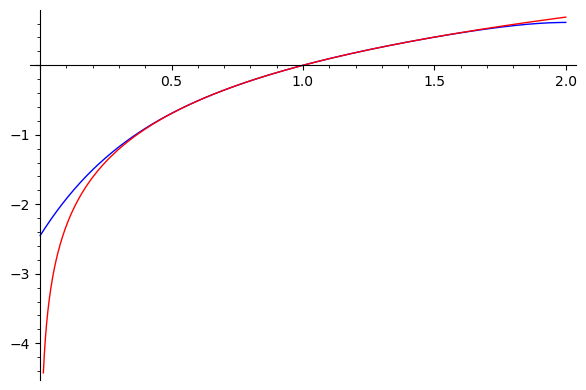

In [65]:
plot(g,(x,0,2))+plot(log(x),(x,0,2),color='red')